In [1]:
class MessageContent:
    def __init__(self, path_list: list[int], val: int):
        self.__path_list = path_list.copy()
        self.__val = val

    def get_path_list(self) -> list[int]:
        return self.__path_list.copy()

    def get_val(self) -> int:
        return self.__val

    def get_content(self) -> tuple[list[int], int]:
        return self.__path_list.copy(), self.__val

    def __str__(self):
        path = ''.join(str(p) for p in self.__path_list)
        return f'path: {path}, val: {self.__val}'

    def __repr__(self):
        return self.__str__()


class Message:
    def __init__(self, content_list: list[MessageContent]):
        self.__contents = content_list.copy()

    def get_content(self) -> list[MessageContent]:
        return self.__contents.copy()

    def __str__(self):
        contents_str = [str(content) for content in self.__contents]
        return '\n'.join(contents_str)

    def __repr__(self):
        return self.__str__()


In [2]:
from typing import Self
import networkx as nx


class Node:
    def __init__(self, parent: Self, proc_uid: int, val: int, path: list[int]):
        self.__proc_uid = proc_uid
        self.__parent = parent
        self.__children = []
        self.__val = val
        self.__path = path.copy()
        self.__depth = len(path)

    def get_proc_uid(self) -> int:
        return self.__proc_uid

    def get_parent(self) -> Self:
        return self.__parent

    def get_children(self) -> list[Self]:
        return self.__children

    def get_val(self) -> int:
        return self.__val

    def get_path(self) -> list[int]:
        return self.__path.copy()

    def get_depth(self) -> int:
        return self.__depth

    def is_leaf(self) -> bool:
        return len(self.__children) == 0

    def is_root(self) -> bool:
        return self.__parent is None

    def add_child(self, child: Self):
        self.__children.append(child)

    def __str__(self):
        correct_path = [str(p) for p in self.get_path()[1:]]
        path = ''.join(correct_path)
        if self.is_leaf():
            return f'path: {path}, val: {self.__val}'
        else:
            return f'path: {path}'

    def __repr__(self):
        return self.__str__()




class EIGByzTree:
    def __init__(self, proc_uid: int, proc_count: int, proc_val: int):
        self.__proc_uid = proc_uid
        self.__proc_count = proc_count
        self.__root = Node(parent=None, proc_uid=-1, val=proc_val, path=[])

    def get_proc_uid(self) -> int:
        return self.__proc_uid

    def get_proc_count(self) -> int:
        return self.__proc_count

    def add_level(self):
        if self.__root.is_leaf():
            for i in range(1, self.__proc_count + 1):
                child = Node(parent=self.__root, proc_uid=i, val=None, path=[-1, i])
                self.__root.add_child(child)
        else:
            for child in self.__root.get_children():
                self.__add_level_non_root(node=child)

    def __add_level_non_root(self, node):
        if node.is_leaf():
            for i in range(1, self.__proc_count + 1):
                if i not in node.get_path():
                    new_path = node.get_path() + [i]
                    child = Node(parent=node, proc_uid=i, val=None, path=new_path)
                    node.add_child(child)
        else:
            for child in node.get_children():
                self.__add_level_non_root(node=child)

    def log(self):
        res = ''
        res += f'root: {self.__root.get_proc_uid()}'
        queue = []
        if not self.__root.is_leaf():
            queue = [c for c in self.__root.get_children()]
        last_depth = 1
        while len(queue) > 0:
            node = queue.pop(0)
            if node.get_depth() != last_depth:
                last_depth += 1
                res += '\n'
            res += node.__str__() + ' '
            if not node.is_leaf():
                queue = queue + node.get_children()
        return res
    
    def __str__(self):
        return self.log()

    def __repr__(self):
        return self.__str__()
    
    def convert_to_networkx_graph(self) -> nx.Graph:
        graph = nx.Graph()
        queue = [self.__root]
        while len(queue) > 0:
            node = queue.pop(0)
            path = ''.join(str(p) for p in node.get_path()[1:])
            if not node.is_root():
                parent = path[:-1] if len(path) > 1 else '-1'
                graph.add_edge(parent, path)
                print(path)
            if not node.is_leaf():
                queue = queue + node.get_children()
        return graph

In [3]:
tree = EIGByzTree(1, 4, 0)
tree.add_level()
tree

root: -1
path: 1, val: None path: 2, val: None path: 3, val: None path: 4, val: None 

In [4]:
tree.add_level()
tree

root: -1
path: 1 path: 2 path: 3 path: 4 
path: 12, val: None path: 13, val: None path: 14, val: None path: 21, val: None path: 23, val: None path: 24, val: None path: 31, val: None path: 32, val: None path: 34, val: None path: 41, val: None path: 42, val: None path: 43, val: None 

In [5]:
tree.add_level()
tree

root: -1
path: 1 path: 2 path: 3 path: 4 
path: 12 path: 13 path: 14 path: 21 path: 23 path: 24 path: 31 path: 32 path: 34 path: 41 path: 42 path: 43 
path: 123, val: None path: 124, val: None path: 132, val: None path: 134, val: None path: 142, val: None path: 143, val: None path: 213, val: None path: 214, val: None path: 231, val: None path: 234, val: None path: 241, val: None path: 243, val: None path: 312, val: None path: 314, val: None path: 321, val: None path: 324, val: None path: 341, val: None path: 342, val: None path: 412, val: None path: 413, val: None path: 421, val: None path: 423, val: None path: 431, val: None path: 432, val: None 

In [6]:
tree.add_level()
tree

root: -1
path: 1 path: 2 path: 3 path: 4 
path: 12 path: 13 path: 14 path: 21 path: 23 path: 24 path: 31 path: 32 path: 34 path: 41 path: 42 path: 43 
path: 123 path: 124 path: 132 path: 134 path: 142 path: 143 path: 213 path: 214 path: 231 path: 234 path: 241 path: 243 path: 312 path: 314 path: 321 path: 324 path: 341 path: 342 path: 412 path: 413 path: 421 path: 423 path: 431 path: 432 
path: 1234, val: None path: 1243, val: None path: 1324, val: None path: 1342, val: None path: 1423, val: None path: 1432, val: None path: 2134, val: None path: 2143, val: None path: 2314, val: None path: 2341, val: None path: 2413, val: None path: 2431, val: None path: 3124, val: None path: 3142, val: None path: 3214, val: None path: 3241, val: None path: 3412, val: None path: 3421, val: None path: 4123, val: None path: 4132, val: None path: 4213, val: None path: 4231, val: None path: 4312, val: None path: 4321, val: None 

In [7]:
g = tree.convert_to_networkx_graph()

1
2
3
4
12
13
14
21
23
24
31
32
34
41
42
43
123
124
132
134
142
143
213
214
231
234
241
243
312
314
321
324
341
342
412
413
421
423
431
432
1234
1243
1324
1342
1423
1432
2134
2143
2314
2341
2413
2431
3124
3142
3214
3241
3412
3421
4123
4132
4213
4231
4312
4321


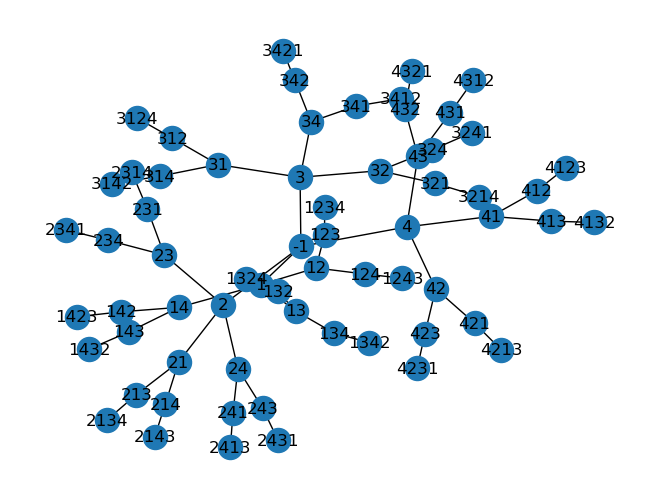

In [8]:
nx.draw(g, with_labels=True)

In [9]:
"""
resource: https://epidemicsonnetworks.readthedocs.io/en/latest/_modules/EoN/auxiliary.html#hierarchy_pos
"""

import random
import matplotlib.pyplot as plt
import networkx as nx


def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, leaf_vs_root_factor=0.5):
    '''
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    Based on Joel's answer at https://stackoverflow.com/a/29597209/2966723,
    but with some modifications.  

    We include this because it may be useful for plotting transmission trees,
    and there is currently no networkx equivalent (though it may be coming soon).
    
    There are two basic approaches we think of to allocate the horizontal 
    location of a node.  
    
    - Top down: we allocate horizontal space to a node.  Then its ``k`` 
      descendants split up that horizontal space equally.  This tends to result
      in overlapping nodes when some have many descendants.
    - Bottom up: we allocate horizontal space to each leaf node.  A node at a 
      higher level gets the entire space allocated to its descendant leaves.
      Based on this, leaf nodes at higher levels get the same space as leaf
      nodes very deep in the tree.  
      
    We use use both of these approaches simultaneously with ``leaf_vs_root_factor`` 
    determining how much of the horizontal space is based on the bottom up 
    or top down approaches.  ``0`` gives pure bottom up, while 1 gives pure top
    down.   
    
    
    :Arguments: 
    
    **G** the graph (must be a tree)

    **root** the root node of the tree 
    - if the tree is directed and this is not given, the root will be found and used
    - if the tree is directed and this is given, then the positions will be 
      just for the descendants of this node.
    - if the tree is undirected and not given, then a random choice will be used.

    **width** horizontal space allocated for this branch - avoids overlap with other branches

    **vert_gap** gap between levels of hierarchy

    **vert_loc** vertical location of root
    
    **leaf_vs_root_factor**

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, leftmost, width, leafdx=0.2, vert_gap=0.2, vert_loc=0,
                       xcenter=0.5, rootpos=None,
                       leafpos=None, parent=None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if rootpos is None:
            rootpos = {root: (xcenter, vert_loc)}
        else:
            rootpos[root] = (xcenter, vert_loc)
        if leafpos is None:
            leafpos = {}
        children = list(G.neighbors(root))
        leaf_count = 0
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children) != 0:
            rootdx = width / len(children)
            nextx = xcenter - width / 2 - rootdx / 2
            for child in children:
                nextx += rootdx
                rootpos, leafpos, newleaves = _hierarchy_pos(G, child, leftmost + leaf_count * leafdx,
                                                             width=rootdx, leafdx=leafdx,
                                                             vert_gap=vert_gap, vert_loc=vert_loc - vert_gap,
                                                             xcenter=nextx, rootpos=rootpos, leafpos=leafpos,
                                                             parent=root)
                leaf_count += newleaves

            leftmostchild = min((x for x, y in [leafpos[child] for child in children]))
            rightmostchild = max((x for x, y in [leafpos[child] for child in children]))
            leafpos[root] = ((leftmostchild + rightmostchild) / 2, vert_loc)
        else:
            leaf_count = 1
            leafpos[root] = (leftmost, vert_loc)
        #        pos[root] = (leftmost + (leaf_count-1)*dx/2., vert_loc)
        #        print(leaf_count)
        return rootpos, leafpos, leaf_count

    xcenter = width / 2.
    if isinstance(G, nx.DiGraph):
        leafcount = len([node for node in nx.descendants(G, root) if G.out_degree(node) == 0])
    elif isinstance(G, nx.Graph):
        leafcount = len([node for node in nx.node_connected_component(G, root) if G.degree(node) == 1 and node != root])
    rootpos, leafpos, leaf_count = _hierarchy_pos(G, root, 0, width,
                                                  leafdx=width * 1. / leafcount,
                                                  vert_gap=vert_gap,
                                                  vert_loc=vert_loc,
                                                  xcenter=xcenter)
    pos = {}
    for node in rootpos:
        pos[node] = (
        leaf_vs_root_factor * leafpos[node][0] + (1 - leaf_vs_root_factor) * rootpos[node][0], leafpos[node][1])
    #    pos = {node:(leaf_vs_root_factor*x1+(1-leaf_vs_root_factor)*x2, y1) for ((x1,y1), (x2,y2)) in (leafpos[node], rootpos[node]) for node in rootpos}
    xmax = max(x for x, y in pos.values())
    for node in pos:
        pos[node] = (pos[node][0] * width / xmax, pos[node][1])
    return pos

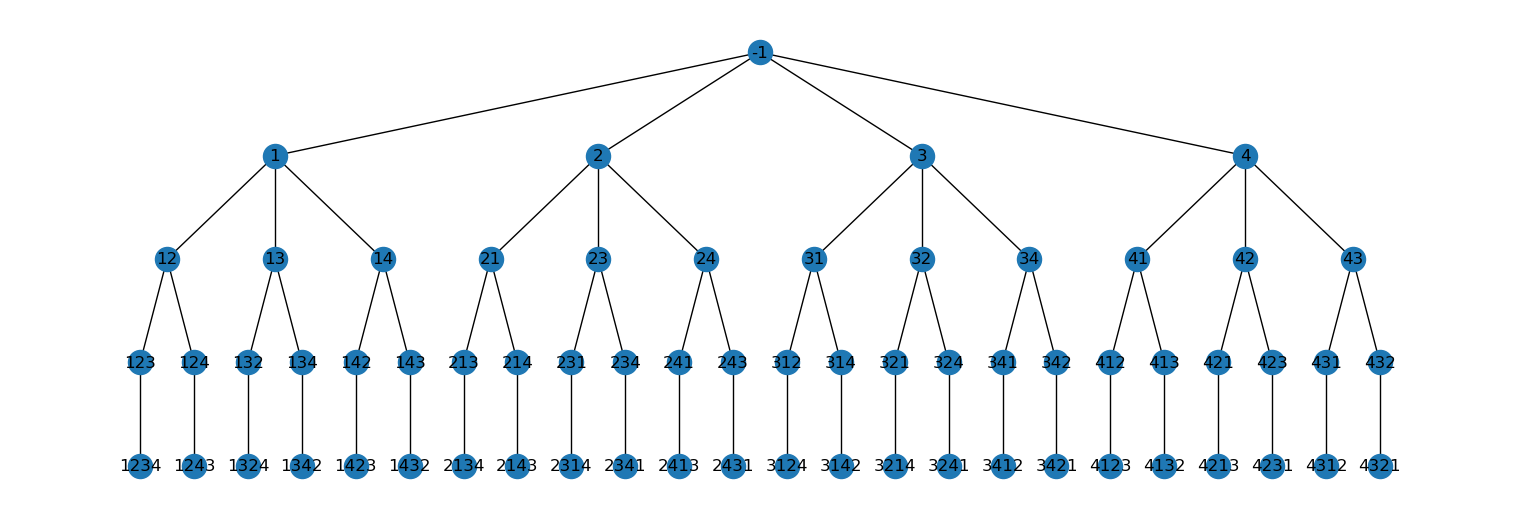

In [10]:
# G = nx.Graph()
# G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7), (3, 8), (3, 9), (4, 10),
#                   (5, 11), (5, 12), (6, 13)])
plt.figure(figsize=(15,5))
pos = hierarchy_pos(g, '-1')
nx.draw(g, pos=pos, with_labels=True)